<a href="https://colab.research.google.com/github/theSLWayne/titanic_model/blob/dev/Keras_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

In [ ]:
download_required = True

if download_required:
  address = 'https://raw.githubusercontent.com/MichaelAllen1966/1804_python_healthcare/master/titanic/data/processed_data.csv'

  data  = pd.read_csv(address)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,CabinNumber,CabinNumberImputed,male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def scale_data(X_train, X_test):
  sc = MinMaxScaler()

  sc.fit(X_train)

  train_sc = sc.transform(X_train)
  test_sc = sc.transform(X_test)

  return train_sc, test_sc

In [ ]:
data = data.astype(float)

data.drop('PassengerId', axis = 1, inplace = True)
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [ ]:
def make_net(number_features, hidden_layers = 3, hidden_layer_neurons = 128, dropuot = 0.0, learning_rate = 0.003):

  # Clear Tensorflow session
  tf.keras.backend.clear_session()

  # Set up neural net
  model = tf.keras.Sequential()

  # Add hidden layers 
  for i in range(hidden_layers):
    model.add(tf.keras.layers.Dense(hidden_layer_neurons, input_dim = number_features, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(dropuot))

  # Add final sigmoid activation output
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

  # Compiling model
  model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), metrics = ['accuracy'])

  return model

In [ ]:
# A model with 10 input features

model = make_net(10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [ ]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Scale data

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [ ]:
def calculate_accuracy(model, X_train_scaled, X_test_scaled, y_train, y_test):

  # Accuracy of training data
  proba = model.predict(X_train_scaled)
  y_pred_train = proba >= 0.5
  y_pred_train = y_pred_train.flatten()
  accuracy_train = np.mean(y_pred_train == y_train)

  # Accuracy of test data
  proba = model.predict(X_test_scaled)
  y_pred_test = proba >= 0.5
  y_pred_test = y_pred_test.flatten()
  accuracy_test = np.mean(y_pred_test == y_test)

  print("Train set accuracy: {}".format(round(accuracy_train, 3)))
  print("Test set accuracy: {}".format(round(accuracy_test, 3)))

In [ ]:
def plot_training(history_dict):
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc_values) + 1)

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Testing accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

In [ ]:
# Fit and run the model

number_features = X_train_scaled.shape[1]
model = make_net(number_features)

# Train model and store training data 

history = model.fit(X_train_scaled, y_train, epochs = 250, batch_size = 64, validation_data = (X_test_scaled, y_test), verbose = 0)

In [ ]:
calculate_accuracy(model, X_train_scaled, X_test_scaled, y_train, y_test)

Train set accuracy: 0.921
Test set accuracy: 0.843


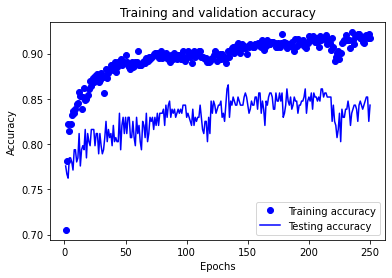

In [ ]:
plot_training(history.history)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# Reduce complexity of the model to avoid overfitting

model = make_net(X_train_scaled.shape[1], hidden_layers = 1, hidden_layer_neurons = 32)

history = model.fit(X_train_scaled, y_train, epochs = 250, batch_size = 64, validation_data = (X_test_scaled, y_test), verbose = 0)

In [ ]:
calculate_accuracy(model, X_train_scaled, X_test_scaled, y_train, y_test)

Train set accuracy: 0.883
Test set accuracy: 0.812


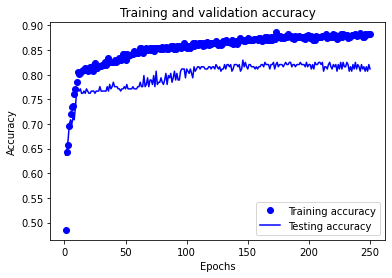

In [ ]:
plot_training(history.history)

In [ ]:
# Reduce training time to avoid overfitting

model = make_net(X_train_scaled.shape[1])

history = model.fit(X_train_scaled, y_train, epochs = 25, batch_size = 64, validation_data = (X_test_scaled, y_test), verbose = 0)

In [ ]:
calculate_accuracy(model, X_train_scaled, X_test_scaled, y_train, y_test)

Train set accuracy: 0.877
Test set accuracy: 0.812


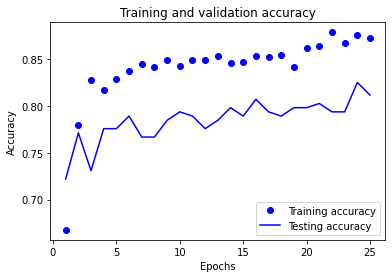

In [ ]:
plot_training(history.history)

In [ ]:
# Add dropout to avoid overfitting

model = make_net(X_train_scaled.shape[1], dropuot = 0.5)

history = model.fit(X_train_scaled, y_train, epochs = 250, batch_size = 64, validation_data = (X_test_scaled, y_test), verbose = 0)

In [31]:
calculate_accuracy(model, X_train_scaled, X_test_scaled, y_train, y_test)

Train set accuracy: 0.892
Test set accuracy: 0.803


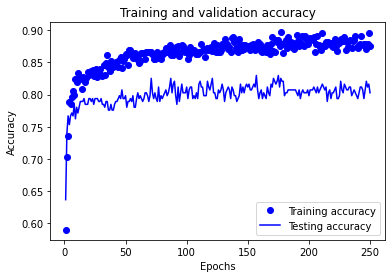

In [32]:
plot_training(history.history)

In [33]:
# Checkpoints

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only = True)

# Early stopping callback - stop when no validation improvement for 25 epochs and restore weights to best validation accuracy
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 25, restore_best_weights = True)

model = make_net(X_train_scaled.shape[1])

history = model.fit(X_train_scaled, y_train, epochs = 250, batch_size = 64, validation_data = (X_test_scaled, y_test), verbose = 0, callbacks = [checkpoint_cb, early_stopping_cb])

In [34]:
calculate_accuracy(model, X_train_scaled, X_test_scaled, y_train, y_test)

Train set accuracy: 0.852
Test set accuracy: 0.776


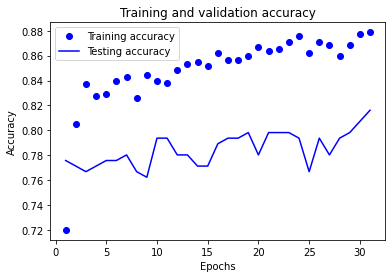

In [35]:
plot_training(history.history)